C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 250 rows for RELIANCE.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 250 rows for TCS.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 251 rows for INFY.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 251 rows for HDFCBANK.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 251 rows for ICICIBANK.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 251 rows for SBIN.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 251 rows for ITC.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 250 rows for TATAMOTORS.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 250 rows for NIFTYBEES.NS.


C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


  -> Downloaded 250 rows for GOLDBEES.NS.

Finished download loop.
Tickers with data: ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'SBIN.NS', 'ITC.NS', 'TATAMOTORS.NS', 'NIFTYBEES.NS', 'GOLDBEES.NS']

First few rows of price data:
            RELIANCE.NS       TCS.NS      INFY.NS  HDFCBANK.NS  ICICIBANK.NS  \
Date                                                                           
2024-12-05  1316.790894  4313.990723  1879.235229   920.433533   1326.266479   
2024-12-06  1306.332642  4296.063965  1867.143188   915.549500   1318.575806   
2024-12-09  1289.997925  4302.490234  1868.357300   922.530212   1312.175171   
2024-12-10  1279.738770  4283.548828  1892.541504   921.592834   1320.262695   
2024-12-11  1273.115234  4278.620605  1917.405640   919.126160   1317.335327   

               SBIN.NS      ITC.NS  TATAMOTORS.NS  NIFTYBEES.NS  GOLDBEES.NS  
Date                                                                          
2024-12-05  848.414246  451

C:\Users\vivek\AppData\Local\Temp\ipykernel_13824\3498600032.py:95: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_df = price_df.pct_change()


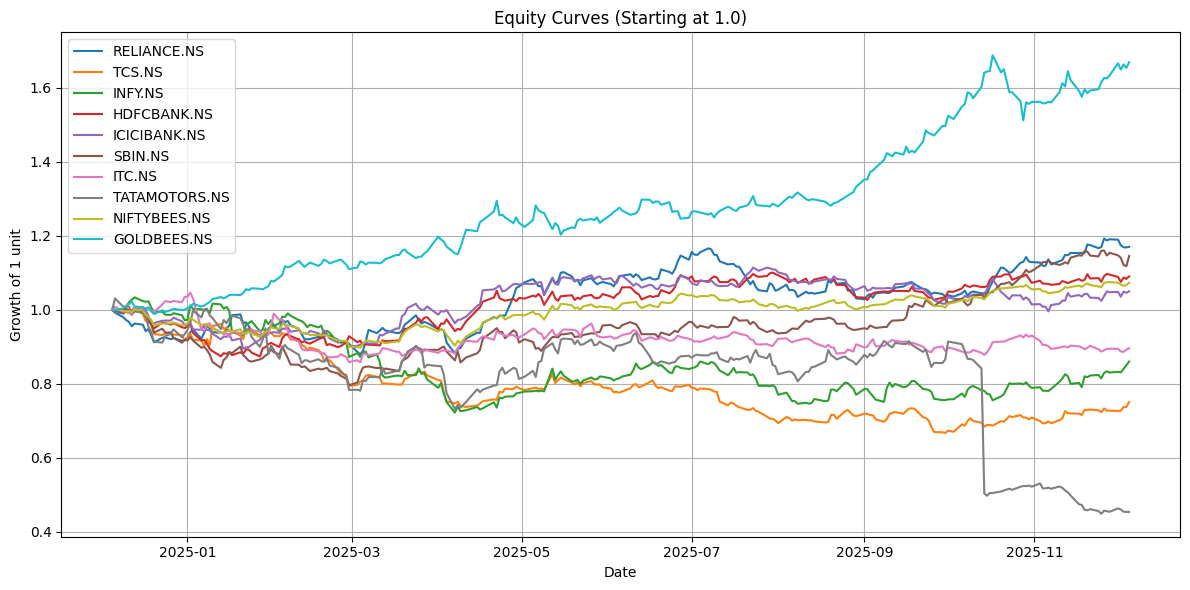

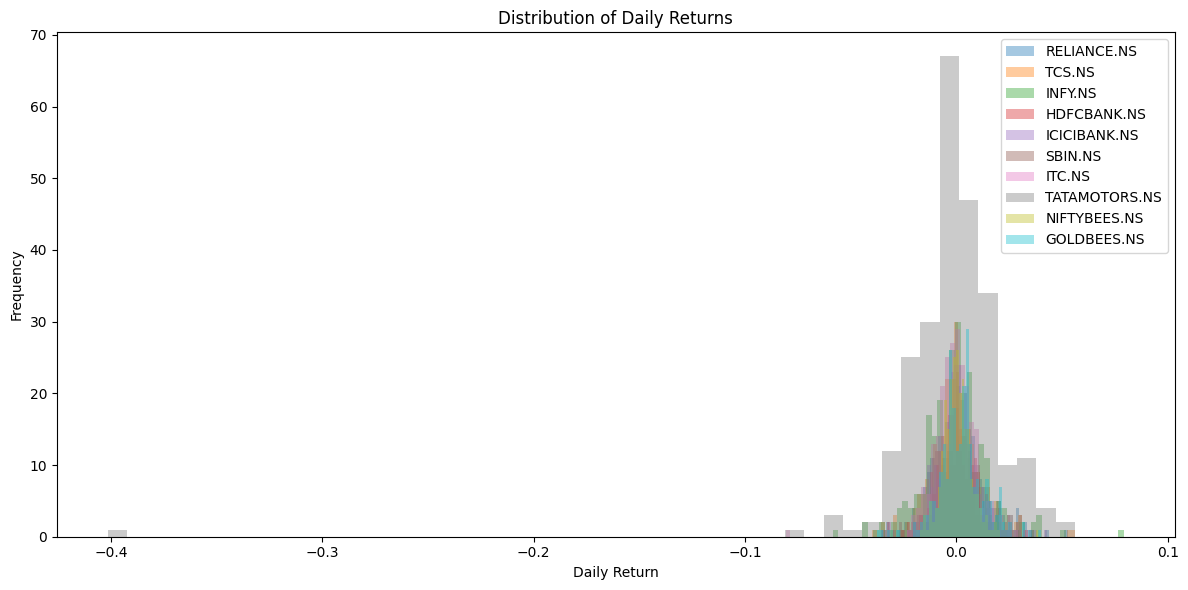

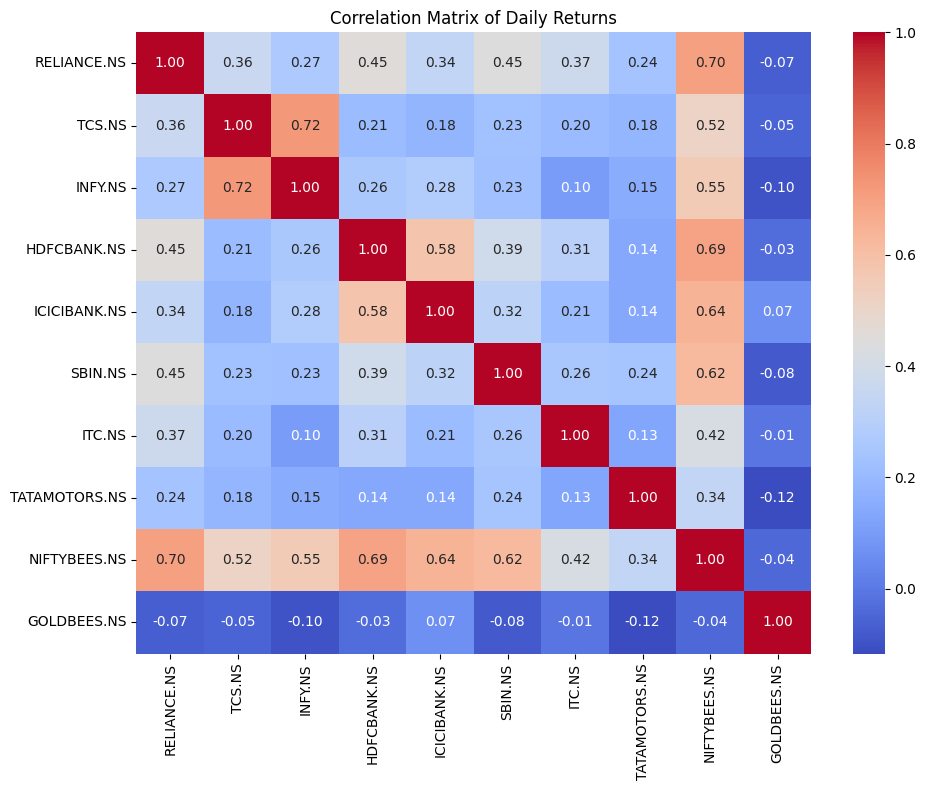


Summary, returns, and equity curves saved as CSV files.


In [ ]:
# =======================================
# PORTFOLIO RISK & RETURN DASHBOARD
# =======================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. PARAMETERS
# -------------------------------
TICKERS = [
    "RELIANCE.NS",
    "TCS.NS",
    "INFY.NS",
    "HDFCBANK.NS",
    "ICICIBANK.NS",
    "SBIN.NS",
    "ITC.NS",
    "TATAMOTORS.NS",
    "NIFTYBEES.NS",
    "GOLDBEES.NS",
]

PERIOD = "1y"        # last 1 year
INTERVAL = "1d"      # daily data
RISK_FREE_RATE = 0.0 # annual RF

# -------------------------------
# 2. DOWNLOAD DATA
# -------------------------------
prices = {}

for ticker in TICKERS:
    print(f"Downloading {ticker} ...")
    try:
        data = yf.download(
            ticker,
            period=PERIOD,
            interval=INTERVAL,
            progress=False
        )
    except Exception as e:
        print(f"  -> ERROR while downloading {ticker}: {e}")
        continue

    if data is None or data.empty:
        print(f"  -> No data returned for {ticker}.")
        continue

    # Sometimes yfinance returns MultiIndex columns, handle it just in case
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.droplevel(1)

    if "Close" not in data.columns:
        print(f"  -> 'Close' column missing for {ticker}, columns are: {data.columns}")
        continue

    close_series = data["Close"].dropna()

    if close_series.empty:
        print(f"  -> Close price is empty for {ticker}.")
        continue

    print(f"  -> Downloaded {len(close_series)} rows for {ticker}.")
    prices[ticker] = close_series

print("\nFinished download loop.")
print("Tickers with data:", list(prices.keys()))

# If nothing got downloaded, stop gracefully
if not prices:
    print("\n❌ No data downloaded for ANY ticker.")
    print("Possible reasons:")
    print("  - No internet connection / blocked access")
    print("  - yfinance / SSL / firewall issue in this environment")
    print("  - Temporary Yahoo Finance issue")
    raise SystemExit("No data downloaded for any ticker.")  # you can remove this line if you don't want the exception

# -------------------------------
# 3. BUILD PRICE DATAFRAME
# -------------------------------
price_df = pd.DataFrame(prices)
price_df = price_df.dropna(how="all")

print("\nFirst few rows of price data:")
print(price_df.head())
print("price_df shape:", price_df.shape)

# -------------------------------s
# 4. DAILY RETURNS
# -------------------------------
returns_df = price_df.pct_change()
print("\nFirst few rows of daily returns (with NaNs):")
print(returns_df.head())
print("returns_df shape:", returns_df.shape)

# -------------------------------
# 5. PERFORMANCE METRICS PER STOCK
# -------------------------------
summary_rows = []
trading_days = 252
daily_rf = (1 + RISK_FREE_RATE) ** (1 / trading_days) - 1

for ticker in returns_df.columns:
    ret_series = returns_df[ticker].dropna()

    if ret_series.empty:
        print(f"  -> No return data for {ticker}, skipping metrics.")
        continue

    cumulative_return = (1 + ret_series).prod() - 1
    avg_daily_ret = ret_series.mean()
    annual_return = (1 + avg_daily_ret) ** trading_days - 1

    daily_vol = ret_series.std()
    annual_vol = daily_vol * np.sqrt(trading_days)

    sharpe = np.nan
    if daily_vol != 0:
        excess_daily_ret = avg_daily_ret - daily_rf
        sharpe = (excess_daily_ret / daily_vol) * np.sqrt(trading_days)

    summary_rows.append({
        "Ticker": ticker,
        "CumulativeReturn_%": round(cumulative_return * 100, 2),
        "AnnualReturn_%": round(annual_return * 100, 2),
        "AnnualVol_%": round(annual_vol * 100, 2),
        "Sharpe": round(sharpe, 2),
    })

summary_df = pd.DataFrame.from_records(summary_rows)

print("\n===== PORTFOLIO SUMMARY (PER STOCK) =====\n")
print(summary_df)

# -------------------------------
# 6. EQUITY CURVES
# -------------------------------
equity_df = (1 + returns_df.fillna(0)).cumprod()

plt.figure(figsize=(12, 6))
for ticker in equity_df.columns:
    plt.plot(equity_df.index, equity_df[ticker], label=ticker)

plt.title("Equity Curves (Starting at 1.0)")
plt.xlabel("Date")
plt.ylabel("Growth of 1 unit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 7. DISTRIBUTION OF DAILY RETURNS
# -------------------------------
plt.figure(figsize=(12, 6))
for ticker in returns_df.columns:
    plt.hist(returns_df[ticker].dropna(), bins=50, alpha=0.4, label=ticker)

plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 8. CORRELATION HEATMAP
# -------------------------------
corr_matrix = returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Daily Returns")
plt.tight_layout()
plt.show()

# -------------------------------
# 9. SAVE RESULTS
# -------------------------------
summary_df.to_csv("portfolio_summary.csv", index=False)
returns_df.to_csv("daily_returns.csv")
equity_df.to_csv("equity_curves.csv")

print("\nSummary, returns, and equity curves saved as CSV files.")
